In [1]:
import sys
sys.path.insert(0, '../gofher')

import os
import matplotlib.image as mpimg
import numpy as np

from gofher import run_gofher
from visualize import visualize_difference_images

In [2]:
name = "NGC3726"
paper_label = "W"
folder = "figure10"

In [3]:
path_to_input = "..\\..\\spin-parity-catalog-data\\sdss\\{}".format(folder)
path_to_output = "..\\..\\..\\"

In [4]:
def get_fits_path(name,band):
    """the file path of where existing fits files can be found"""
    return os.path.join(path_to_input,name,"{}_{}.fits".format(name,band))

def get_color_image_path(name):
    return os.path.join(path_to_input,name,"{}_color.png".format(name))

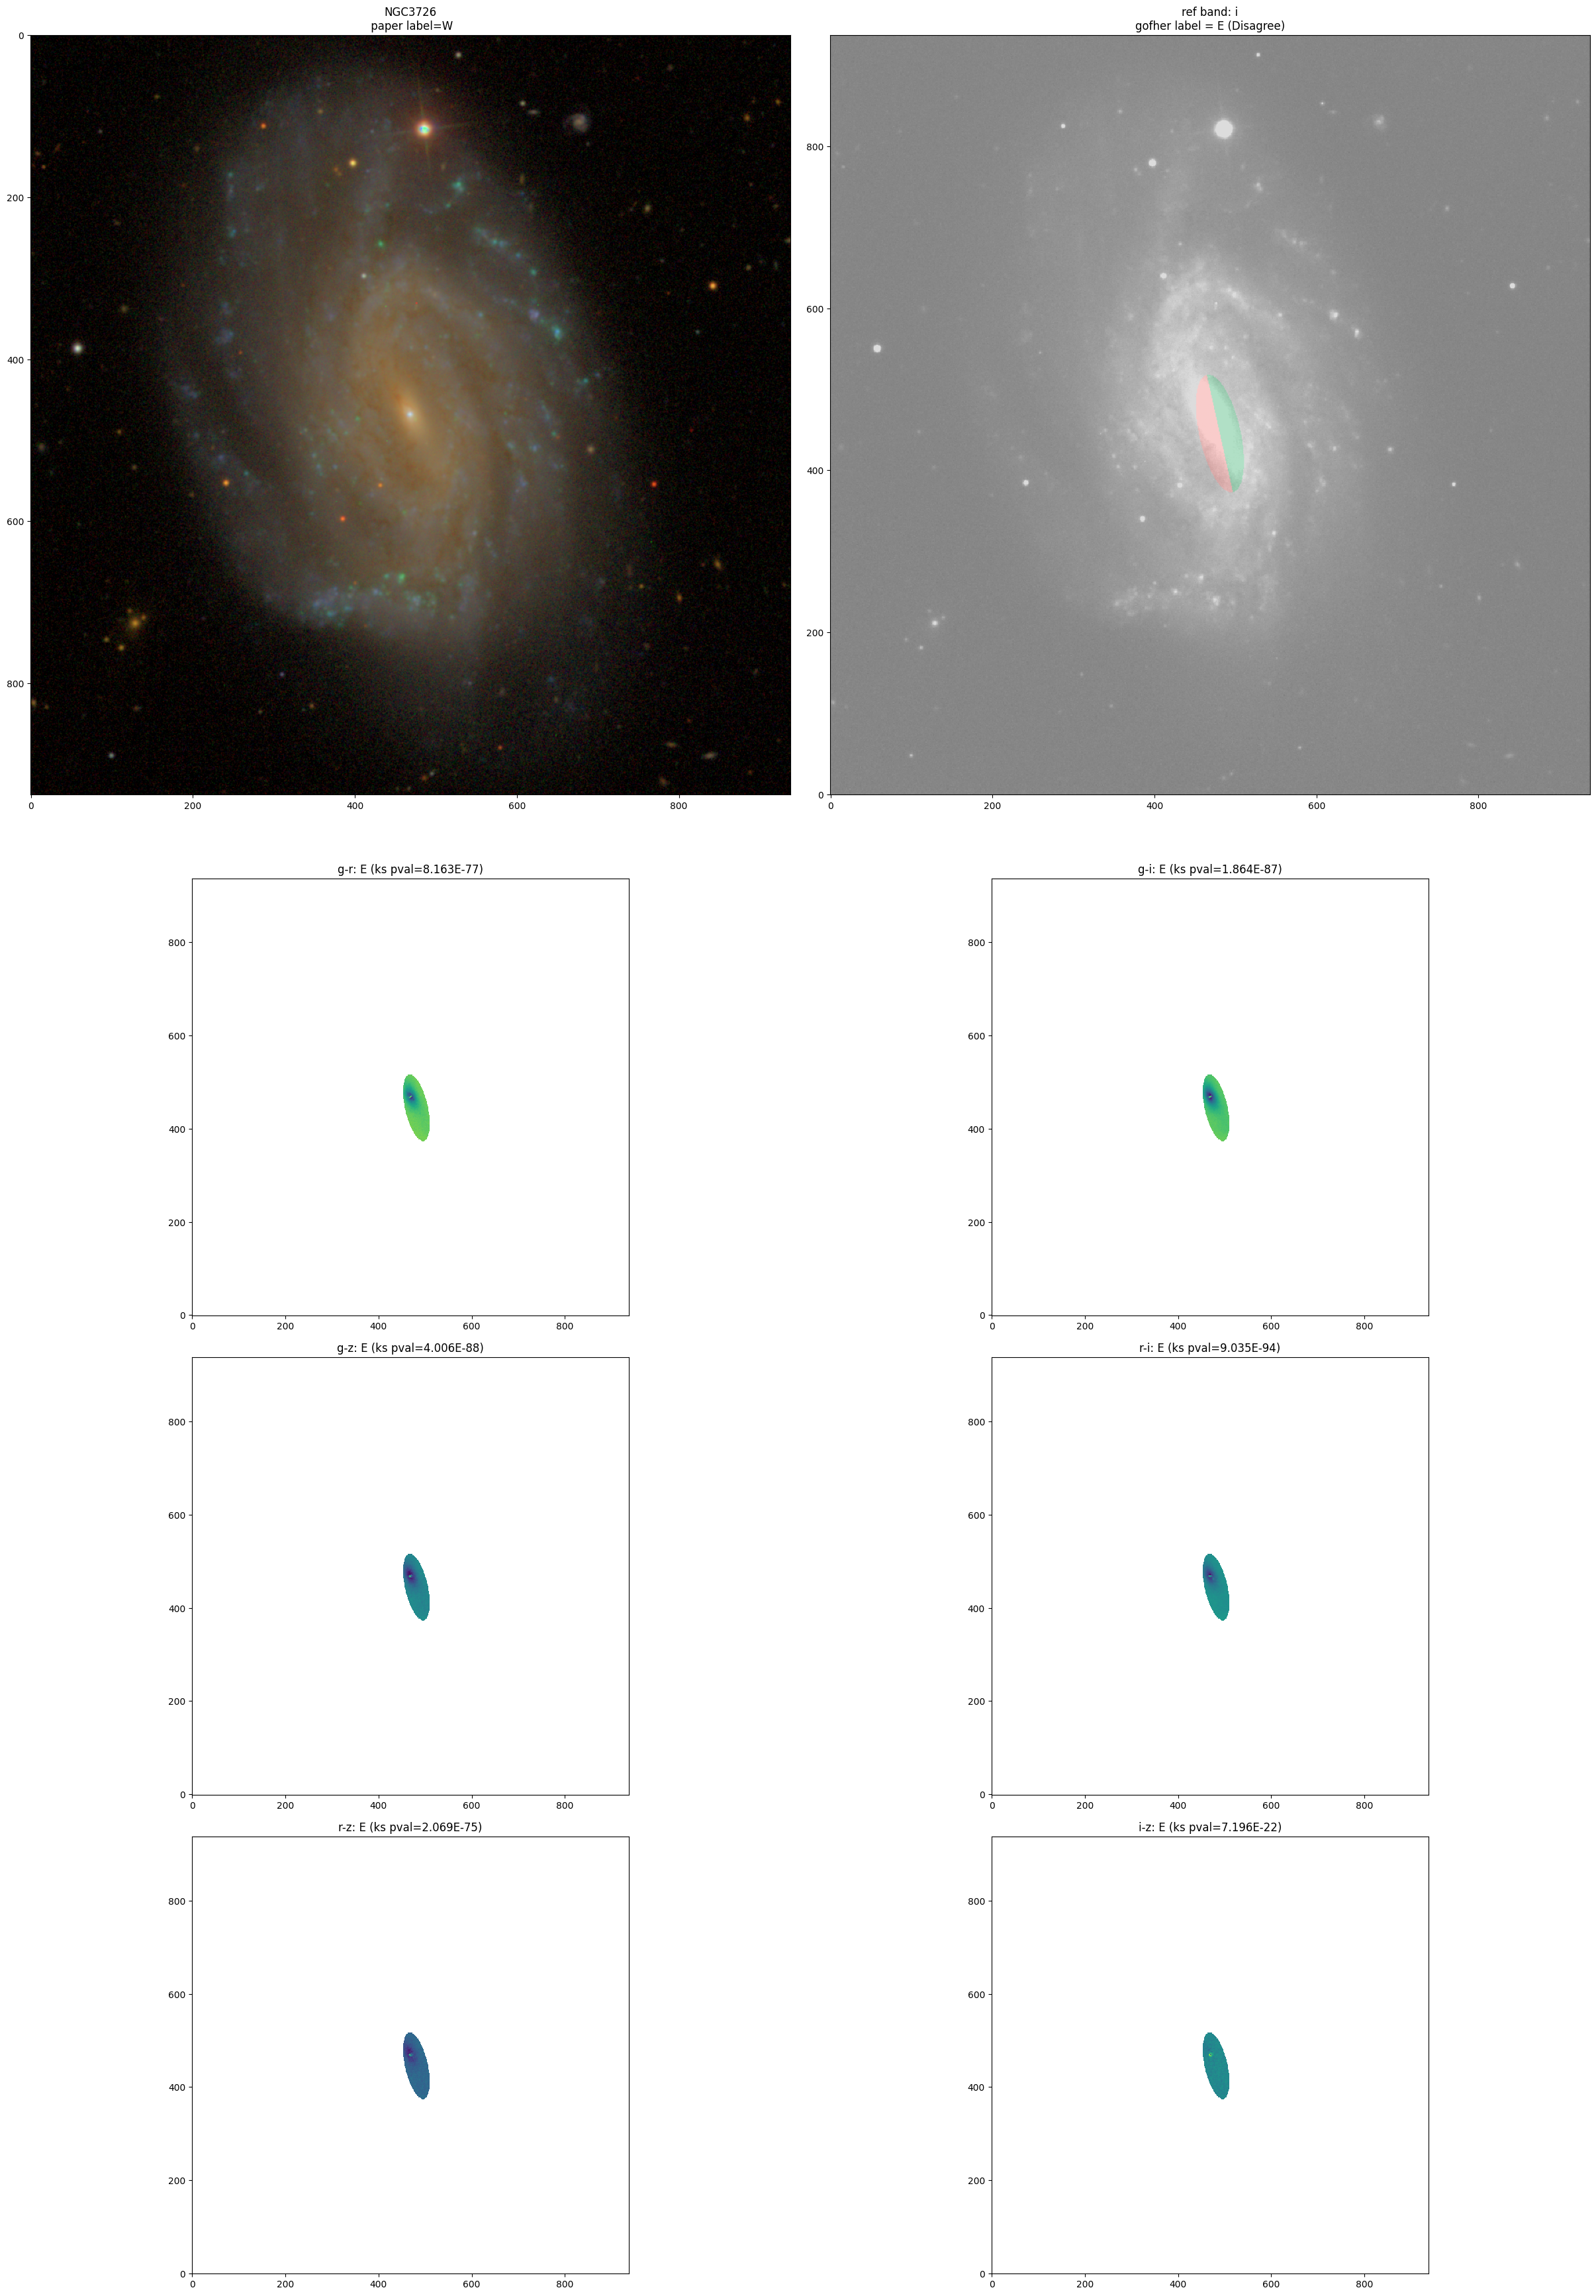

['name', 'paper_label', 'pos_label', 'neg_label', 'r-i_pos_mean', 'r-i_pos_std', 'r-i_neg_mean', 'r-i_neg_std', 'r-i_ks_stat', 'r-i_ks_pval', 'r-i_label', 'r-i_score', 'r-z_pos_mean', 'r-z_pos_std', 'r-z_neg_mean', 'r-z_neg_std', 'r-z_ks_stat', 'r-z_ks_pval', 'r-z_label', 'r-z_score', 'i-z_pos_mean', 'i-z_pos_std', 'i-z_neg_mean', 'i-z_neg_std', 'i-z_ks_stat', 'i-z_ks_pval', 'i-z_label', 'i-z_score', 'total', 'score']
['NGC3726', 'W', 'W', 'E', -0.004124434112418861, 0.0035362430727097684, -0.007868823880386774, 0.008412340995577205, 0.26726617236459804, 9.035022007068031e-94, 'E', -1, -0.012179447898903437, 0.004932039593991519, -0.01678001863827787, 0.010073259165775592, 0.23981823171713643, 2.0689072177896844e-75, 'E', -1, -0.008055013786484577, 0.0038706676664121125, -0.008911194757891094, 0.006063533843984302, 0.12862101970781895, 7.195674642390759e-22, 'E', -1, -3, -1]


In [5]:
if not os.path.exists(path_to_input):
    raise ValueError("The path to the input is not found {} - make sure you update path_to_input".format(path_to_input))

if not os.path.exists(path_to_output):
    raise ValueError("The path output is not found {} - make sure you update ppath_to_output".format(path_to_output))

gal = run_gofher(name,get_fits_path,['g','r','i','z'],['i','z','y','r'], paper_label)

color_image = color = mpimg.imread(get_color_image_path(name))
color_image = np.flipud(color_image) #flip the image left to right to fix orientation
visualize_difference_images(gal,color_image,['g','r','i','z'],paper_label)

(header,row) = gal.get_verbose_csv_header_and_row(['r','i','z'],paper_label)
print(header)
print(row)